In [2]:
# Import necessary libraries
import pyswmm  # Library for working with SWMM (Storm Water Management Model)
import pandas as pd  # Data manipulation and analysis library
import numpy as np  # Numerical operations library
import matplotlib  # Comprehensive library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt  # Matplotlib's pyplot interface for plotting
import pathlib  # Object-oriented filesystem paths

# Set font properties for matplotlib
font = {'family' : 'Times New Roman',
        'weight' : 'bold',
        'size'   : 12}
matplotlib.rc('font', **font)  # Apply font settings to matplotlib
matplotlib.rcParams['figure.dpi'] = 600  # Set the resolution of the figure
matplotlib.rcParams["mathtext.fontset"] = "dejavuserif"  # Set the font for math text
matplotlib.rcParams['text.usetex'] = False  # Disable the use of LaTeX for text rendering

In [3]:
# Define the directory path to the 'Networks' folder
dir = pathlib.Path.cwd().parent / 'Networks'

# Read the CSV files containing computation time and continuity errors
comps1 = pd.read_csv(dir/pathlib.Path('Modena/Comp_times_solspeed.csv'))
conts1 = pd.read_csv(dir/pathlib.Path('Modena/Continuity_Errors_solspeed_1000to100m.csv'))

# Rename the columns for better readability
comps1.rename(columns = {comps1.columns[0]:'Sol Speed',"1000m":1000,"250m":250, "100m": 100, "50m":50, "10m":10}, inplace=True)
conts1.rename(columns = {conts1.columns[0]:'Sol Speed',"1000m":1000,"250m":250, "100m": 100, "50m":50, "10m":10}, inplace=True)

# Sort the dataframes by the 'Timestep' column
comps1.sort_values('Sol Speed', inplace = True)
conts1.sort_values('Sol Speed', inplace = True)  # Fixed missing 'Timestep' argument

# Reset the index to 'Timestep' and drop the old index
comps1 = comps1.reset_index(drop=True).set_index('Sol Speed', drop = True)
conts1 = conts1.reset_index(drop=True).set_index('Sol Speed', drop = True)

# Apply transformations: absolute values for 'conts1' and convert 'comps1' to minutes
conts1 = conts1.apply(lambda x : abs(x))
comps1 = comps1.apply(lambda x : x/60)  # convert to minutes

# Drop duplicate indices
comps1 = comps1[~comps1.index.duplicated(keep='first')]
conts1 = conts1[~conts1.index.duplicated(keep='first')]

# Display the first few rows of the 'conts1' dataframe
conts1.head()

,1000,250,100
Sol Speed,,,
1.000000,2407.761719,3128.652588,8693.897461
1.132541,2407.761719,3128.652588,8693.897461
1.282650,2407.761719,3128.652588,8693.897461
1.452654,2407.761719,3128.652588,8693.897461
1.645191,2407.761719,3128.652588,8693.897461


In [4]:
# Define the directory path to the 'Networks' folder
dir = pathlib.Path.cwd().parent / 'Networks'

# Read the CSV files containing computation times and continuity errors
comps2 = pd.read_csv(dir/pathlib.Path('Modena/Comp_times_solspeed 50 to 25 m.csv'))
conts2 = pd.read_csv(dir/pathlib.Path('Modena/Continuity_Errors_solspeed_50 to 25 m.csv'))

# Rename the columns for better readability
comps2.rename(columns = {comps2.columns[0]:'Sol Speed',"1000m":1000,"250m":250, "100m": 100, "50m":50, "25m":25}, inplace=True)
conts2.rename(columns = {conts2.columns[0]:'Sol Speed',"1000m":1000,"250m":250, "100m": 100, "50m":50, "25m":25}, inplace=True)

# Sort the dataframes by the 'Timestep' column
comps2.sort_values('Sol Speed', inplace = True)
conts2.sort_values('Sol Speed', inplace = True)  # Fixed missing 'Timestep' argument

# Reset the index to 'Timestep' and drop the old index
comps2 = comps2.reset_index(drop=True).set_index('Sol Speed', drop = True)
conts2 = conts2.reset_index(drop=True).set_index('Sol Speed', drop = True)

# Apply transformations: absolute values for 'conts1' and convert 'comps1' to minutes
conts2 = conts2.apply(lambda x : abs(x))
comps2 = comps2.apply(lambda x : x/60)  # convert to minutes

# Drop duplicate indices
comps2 = comps2[~comps2.index.duplicated(keep='first')]
conts2 = conts2[~conts2.index.duplicated(keep='first')]

# Display the first few rows of the 'conts1' dataframe
conts2.head()

,50,25
Sol Speed,,
1.000000,22692.97266,44468.433590
1.097844,20953.60742,41395.117190
1.205261,19501.26172,38384.878910
1.323188,18150.42383,3.547580
1.452654,16944.46484,2.975111


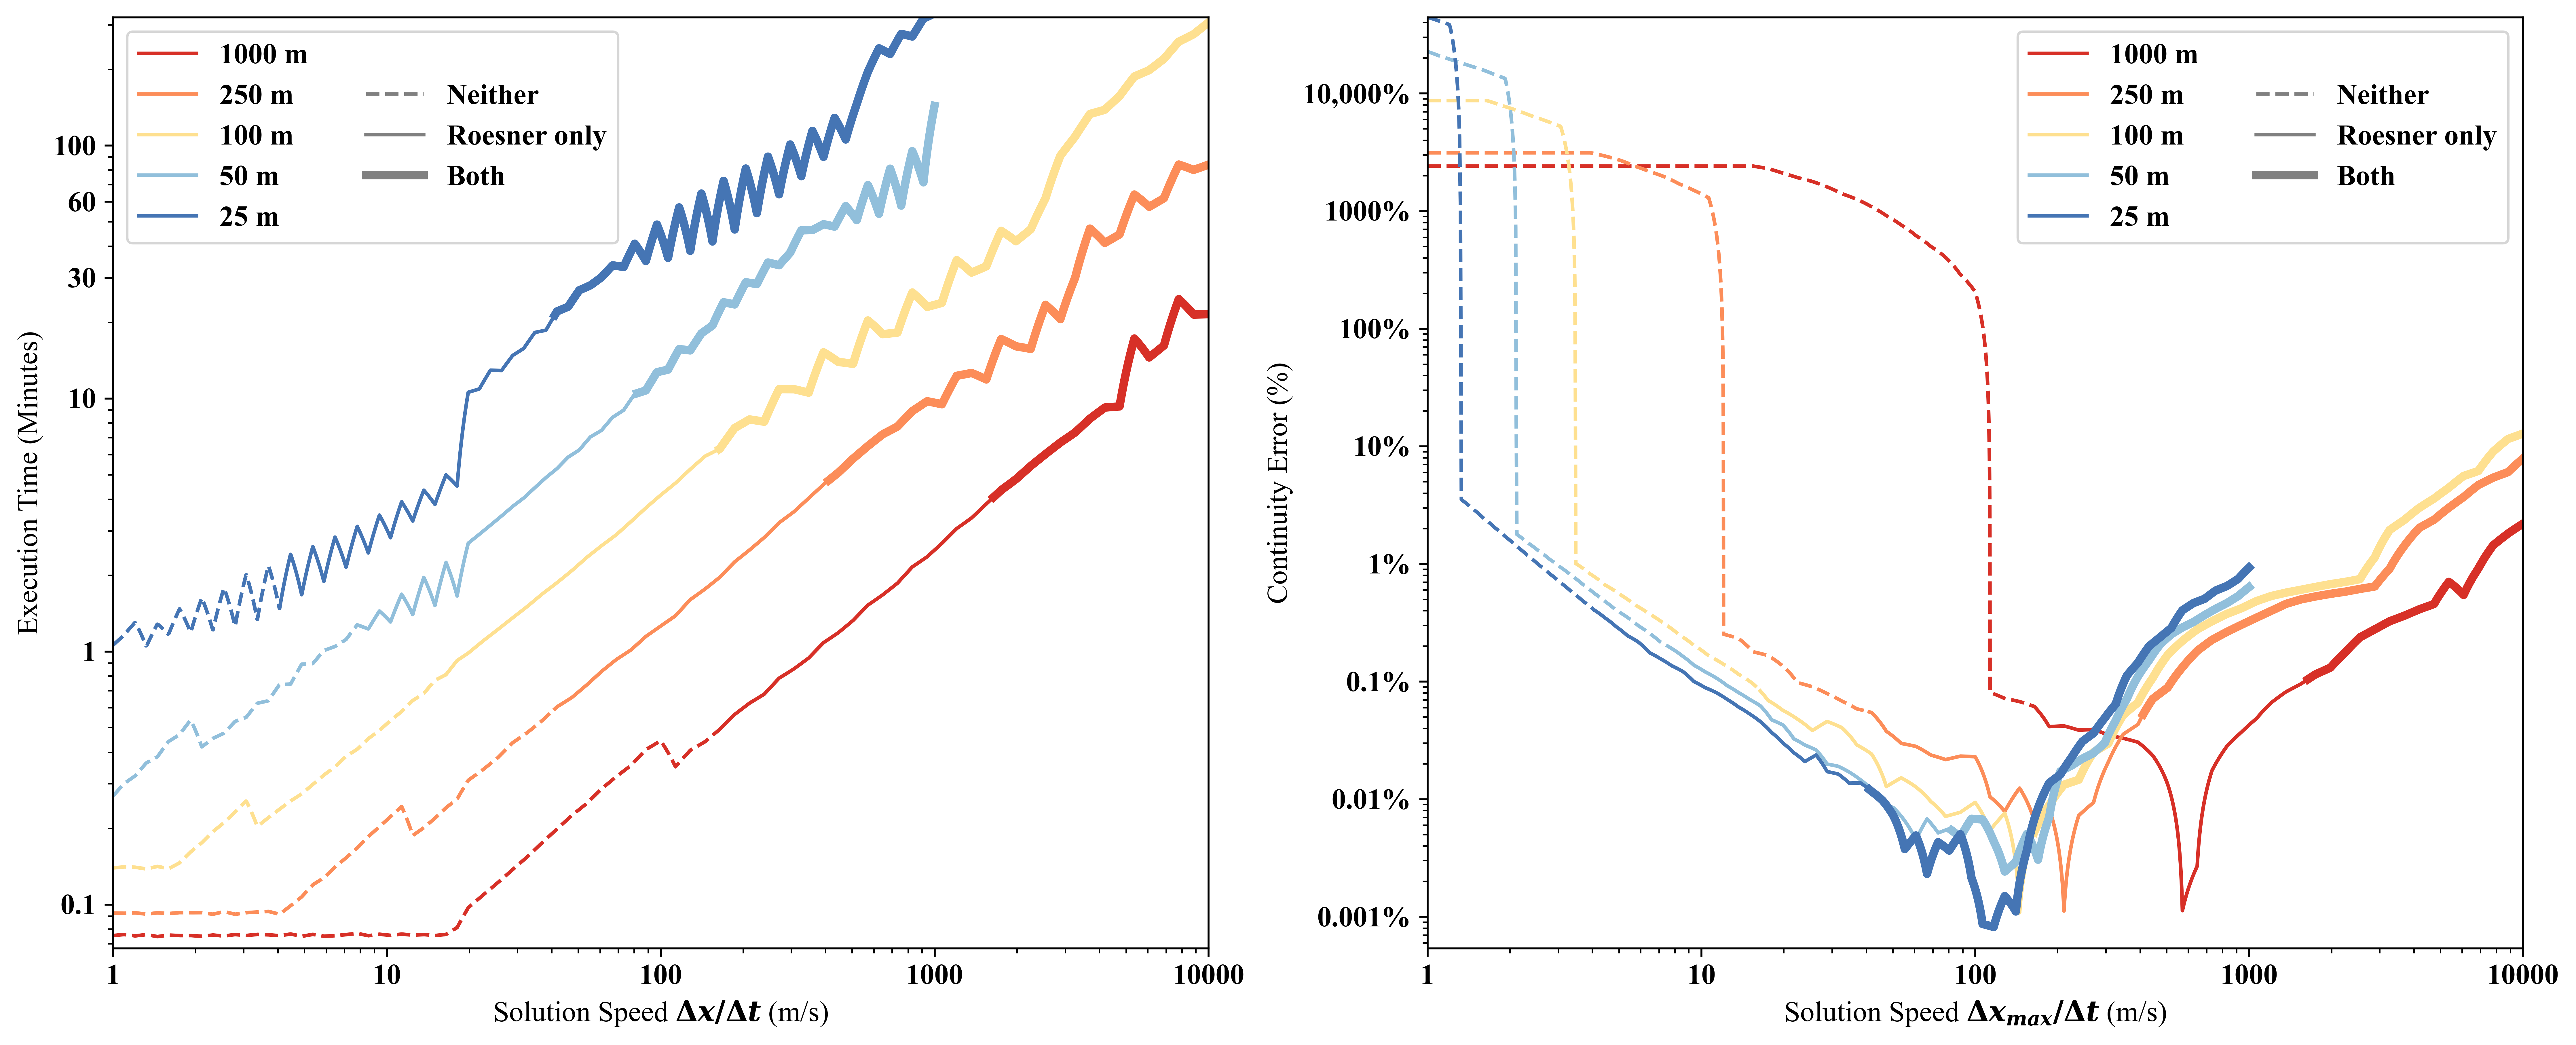

In [5]:
from scipy.interpolate import interp1d
from matplotlib.lines import Line2D

# Define the interpolation functions

interp1000 = interp1d(comps1.index, comps1[1000], kind='linear')
interp250 = interp1d(comps1.index, comps1[250], kind='linear')
interp100 = interp1d(comps1.index, comps1[100], kind='linear')
interp50 = interp1d(comps2.index, comps2[50], kind='linear')
interp25 = interp1d(comps2.index, comps2[25], kind='linear')


interp_list = [interp1000, interp250, interp100, interp50, interp25]

min_length = 6.03  #m
max_D =  0.1
vasconcelos_t_max = 0.1 * min_length / np.sqrt(9.81 * max_D)
roesner_t_max = vasconcelos_t_max * 10

vasconcelos_markers_x = [x / vasconcelos_t_max for x in [1000, 250, 100, 50, 25]]
roesner_markers_x = [x / roesner_t_max for x in [1000, 250, 100, 50, 25]]

# Define colors and labels
list_of_colors = ['#d73027', '#fc8d59','#fee090','#91bfdb',"#4575b4"]
labels = ['1000 m', '250 m', '100 m', '50 m', '25 m']

fig, ax = plt.subplots(1, 2)
fig.set_figheight(7)
fig.set_figwidth(18)
ax[0].set_yscale('log')
ax[0].set_xscale('log')
for i in range(len(vasconcelos_markers_x)):
    ax[0].plot(np.arange(1, roesner_markers_x[i], 0.01), interp_list[i](np.arange(1, roesner_markers_x[i], 0.01)), c=list_of_colors[i], linestyle='--')
    ax[0].plot(np.arange(roesner_markers_x[i], vasconcelos_markers_x[i], 0.01), interp_list[i](np.arange(roesner_markers_x[i], vasconcelos_markers_x[i], 0.01)), c=list_of_colors[i], label=labels[i])
    if i > 2:
        end = 1000
    else:
        end = 10000
    ax[0].plot(np.arange(vasconcelos_markers_x[i], end, 0.01), interp_list[i](np.arange(vasconcelos_markers_x[i], end, 0.01)), c=list_of_colors[i], lw=3.5)

formatter = plt.LogFormatter(labelOnlyBase=False)
ax[0].xaxis.set_major_formatter(formatter)
ax[0].set_xlim(1,10000)
ax[0].set_xticks([1,10,100, 1000,10000])
# ax[0].set_xticklabels([0.01,0.1, 1, "10, "10,000"])
ax[0].set_yticks([0.1,1,10,30,60,100])
ax[0].set_yticklabels([0.1,1,10,30,60,100])
ax[0].set_ylim(comps1.min().min()*0.9,comps1.max().max()*1.05)
ax[0].set_ylabel("Execution Time (Minutes)")
ax[0].set_xlabel(r"Solution Speed $\Delta x / \Delta t$ (m/s)")


ax[1].set_yscale('log')
ax[1].set_xscale('log')

interp1000 = interp1d(conts1.index, conts1[1000], kind='linear')
interp250 = interp1d(conts1.index, conts1[250], kind='linear')
interp100 = interp1d(conts1.index, conts1[100], kind='linear')
interp50 = interp1d(conts2.index, conts2[50], kind='linear')
interp25 = interp1d(conts2.index, conts2[25], kind='linear')

interp_list = [interp1000, interp250, interp100, interp50, interp25]
# Plot the data with different linestyles
for i in range(len(vasconcelos_markers_x)):
    ax[1].plot(np.arange(1, roesner_markers_x[i], 0.01), interp_list[i](np.arange(1, roesner_markers_x[i], 0.01)), c=list_of_colors[i], linestyle='--')
    ax[1].plot(np.arange(roesner_markers_x[i], vasconcelos_markers_x[i], 0.01), interp_list[i](np.arange(roesner_markers_x[i], vasconcelos_markers_x[i], 0.01)), c=list_of_colors[i], label=labels[i])
    if i > 2:
        end = 1000
    else:
        end = 10000
    ax[1].plot(np.arange(vasconcelos_markers_x[i], end, 0.01), interp_list[i](np.arange(vasconcelos_markers_x[i], end, 0.01)), c=list_of_colors[i], lw=3.5)

# Custom legend handles for different linestyles
custom_legend_handles = [
    Line2D([0], [0], color='white', linestyle='-', label=''),
    Line2D([0], [0], color='gray', linestyle='--', label='Neither'),
    Line2D([0], [0], color='gray', linestyle='-', label='Roesner Only'),
    Line2D([0], [0], color='gray', linestyle='-', label='Both', lw = 3.5),
    Line2D([0], [0], color='white', linestyle='-', label='')
]

# Get the existing legend handles and labels
handles, labels = ax[0].get_legend_handles_labels()
combined_handles = handles + custom_legend_handles
combined_labels = labels + ['','Neither', 'Roesner only', 'Both','']
ax[0].legend(combined_handles, combined_labels, ncol=2)


# Add the custom legend handles to the plot
ax[1].legend(combined_handles, combined_labels, ncol=2)

ax[1].xaxis.set_major_formatter(formatter)
ax[1].set_xlim(1, 10000)
ax[1].set_xticks([1, 10, 100, 1000, 10000])
ax[1].set_yticks([0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000])
ax[1].set_ylim(conts1.min().min() * 0.5, conts2.max().max())
ax[1].set_yticklabels(["0.001%", "0.01%", "0.1%", "1%", "10%", "100%", "1000%", "10,000%"])
ax[1].set_ylabel("Continuity Error (%)")
ax[1].set_xlabel(r"Solution Speed $\Delta x_{max} / \Delta t$ (m/s)")

plt.show()